In [646]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import gensim
#from googletrans import Translator

from gensim.matutils import softcossim 
from gensim import corpora
import gensim.downloader as api
from gensim.utils import simple_preprocess

import time
from nltk.corpus import stopwords

import glob

# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Leer la ubicación de los archivos

In [666]:
txtfiles = []
for file in glob.glob("*.txt"):
    txtfiles.append(file)
txtfiles.sort()

In [667]:
txtfiles

['nov_12.txt',
 'nov_17.txt',
 'nov_20_incendios.txt',
 'nov_21.txt',
 'nov_21_segunda.txt',
 'nov_24_visita_carabineros.txt',
 'nov_25_poderes_estado.txt',
 'nov_26_infraestructura.txt',
 'nov_27_prensa.txt',
 'nov_6_ingreso_minimo.txt',
 'oct_19_est_emer.txt',
 'oct_24_tarifas.txt',
 'oct_25_aum_pensiones.txt',
 'oct_28_ministros.txt',
 'oct_28_ministros_short.txt',
 'oct_30_no_apec.txt',
 'oct_30_pacos.txt',
 'oct_31_apec_esp.txt',
 'tale.txt']

### Comencemos con español

In [777]:
#Función creada para leer discursos, reemplazar los saltos de línes y quitar stop words
cachedStopWords = stopwords.words("spanish")
def leer_discurso(discurso):
    f = open(discurso, "r") # abrir archivo
    text = f.read().replace('\n',' ')
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    f.close()
    return text

In [778]:
#Leemos los discursos en español
nov_27_prensa = leer_discurso('nov_27_prensa.txt')
nov_26_infraestructura = leer_discurso('nov_26_infraestructura.txt')
nov_25_poderes_estado = leer_discurso('nov_25_poderes_estado.txt')
nov_24_visita_carabineros = leer_discurso('nov_24_visita_carabineros.txt')
nov_20_incendios = leer_discurso('nov_20_incendios.txt')
nov_21_segunda = leer_discurso('nov_21_segunda.txt')
nov_21 = leer_discurso('nov_21.txt')
nov_17 = leer_discurso('nov_17.txt')
nov_12 = leer_discurso('nov_12.txt')
nov_6_ingreso_minimo = leer_discurso('nov_6_ingreso_minimo.txt')
oct_31_apec_esp = leer_discurso('oct_31_apec_esp.txt')
oct_30_pacos = leer_discurso('oct_30_pacos.txt')
oct_30_no_apec = leer_discurso('oct_30_no_apec.txt')
oct_28_ministros = leer_discurso('oct_28_ministros.txt')
oct_28_ministros_short = leer_discurso('oct_28_ministros_short.txt')
oct_25_aum_pensiones = leer_discurso('oct_25_aum_pensiones.txt')
oct_24_tarifas = leer_discurso('oct_24_tarifas.txt')
oct_19_est_emer = leer_discurso('oct_19_est_emer.txt')
tale = leer_discurso('tale.txt')

In [779]:
#creamos un array con los discursos
documents_spa = [nov_27_prensa, nov_26_infraestructura, nov_25_poderes_estado, nov_24_visita_carabineros, nov_21_segunda, nov_21, nov_20_incendios, nov_17, nov_12, nov_6_ingreso_minimo, oct_31_apec_esp, oct_30_pacos, oct_30_no_apec, oct_28_ministros, oct_28_ministros_short, oct_25_aum_pensiones, oct_24_tarifas, oct_19_est_emer, tale]

In [780]:
#se crea el documento Term Matrix
count_vectorizer = CountVectorizer(stop_words='spanish')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents_spa)

#sparse Matrix a Pandas Dataframe para ver la frecuencia de las palabras
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['nov_27_prensa', 'nov_26_infraestructura', 'nov_25_poderes_estado', 'nov_24_visita_carabineros', 'nov_21_segunda', 'nov_21', 'nov_20_incendios', 'nov_17', 'nov_12', 'nov_6_ingreso_minimo', 'oct_31_apec_esp', 'oct_30_pacos', 'oct_30_no_apec', 'oct_28_ministros', 'oct_28_ministros_short', 'oct_25_aum_pensiones', 'oct_24_tarifas', 'oct_19_est_emer', 'tale'])
df

11  110  13  15  154  171  188  190  20  200  ...  \
nov_27_prensa               0    0   0   0    0    0    1    0   0    0  ...   
nov_26_infraestructura      0    0   0   0    0    0    0    0   0    0  ...   
nov_25_poderes_estado       0    0   0   0    0    0    0    0   0    0  ...   
nov_24_visita_carabineros   0    0   0   0    1    1    0    0   0    0  ...   
nov_21_segunda              0    0   0   0    0    0    0    0   0    0  ...   
nov_21                      0    0   0   0    0    0    0    0   0    1  ...   
nov_20_incendios            0    1   0   0    0    0    0    0   0    0  ...   
nov_17                      0    0   0   0    0    0    0    0   1    0  ...   
nov_12                      0    0   0   0    0    0    0    0   0    0  ...   
nov_6_ingreso_minimo        0    0   0   1    0    0    0    1   0    0  ...   
oct_31_apec_esp             0    0   1   0    0    0    0    0   0    0  ...   
oct_30_pacos                0    0   0   0    0    0    0    0   1    0  ...   
oct_30_no_apec              0    0   0   0    0    0    0    0   0    0  ...   
oct_28_ministros            3    0   0   0    0    0    0    0   0    0  ...   
oct_28_ministros_short      0    0   0   0    0    0    0    0   0    0  ...   
oct_25_aum_pensiones        0    0   0   0    0    0    0    0   2    0  ...   
oct_24_tarifas              0    0   0   0    0    0    0    0   0    0  ...   
oct_19_est_emer             0    0   0   0    0    0    0    0   0    0  ...   
tale                        0    0   0   0    0    0    0    0   0    0  ...   

                           ésta  éstas  éste  éxito  íntimamente  órgano  \
nov_27_prensa                 0      0     0      0            0       0   
nov_26_infraestructura        0      0     0      0            0       0   
nov_25_poderes_estado         0      0     0      0            0       0   
nov_24_visita_carabineros     0      0     0      0            0       0   
nov_21_segunda                0      0     0      0            0       0   
nov_21                        0      0     1      0            0       0   
nov_20_incendios              0      0     0      0            0       0   
nov_17                        0      0     0      0            0       1   
nov_12                        0      0     0      0            0       0   
nov_6_ingreso_minimo          0      0     1      0            0       0   
oct_31_apec_esp               0      0     0      0            0       0   
oct_30_pacos                  0      0     0      0            0       0   
oct_30_no_apec                1      0     3      0            0       0   
oct_28_ministros              0      1     0      0            0       0   
oct_28_ministros_short        0      1     0      0            0       0   
oct_25_aum_pensiones          0      0     0      1            0       0   
oct_24_tarifas                0      0     0      0            1       0   
oct_19_est_emer               0      0     0      0            0       0   
tale                          0      0     0      1            0       0   

                           última  últimas  últimos  útil  
nov_27_prensa                   0        2        0     0  
nov_26_infraestructura          0        3        2     0  
nov_25_poderes_estado           0        1        0     0  
nov_24_visita_carabineros       0        0        0     0  
nov_21_segunda                  0        0        2     0  
nov_21                          0        0        0     0  
nov_20_incendios                0        0        1     0  
nov_17                          2        3        0     0  
nov_12                          1        1        0     0  
nov_6_ingreso_minimo            0        0        0     0  
oct_31_apec_esp                 0        0        0     0  
oct_30_pacos                    0        1        0     0  
oct_30_no_apec                  0        1        0     0  
oct_28_ministros                0        1        0     0  
oct_2

In [781]:
#creamos la matrix de cosine similarity
final_esp = cosine_similarity(df, df)
df_cs = pd.DataFrame(final_esp)

In [782]:
#renombrar columnas e índices
df_cs.columns = ['nov_27_prensa', 'nov_26_infraestructura', 'nov_25_poderes_estado', 'nov_24_visita_carabineros', 'nov_21_segunda', 'nov_21', 'nov_20_incendios', 'nov_17', 'nov_12', 'nov_6_ingreso_minimo', 'oct_31_apec_esp', 'oct_30_pacos', 'oct_30_no_apec', 'oct_28_ministros', 'oct_28_ministros_short', 'oct_25_aum_pensiones', 'oct_24_tarifas', 'oct_19_est_emer', 'tale']
df_cs.index = ['nov_27_prensa', 'nov_26_infraestructura', 'nov_25_poderes_estado', 'nov_24_visita_carabineros', 'nov_21_segunda', 'nov_21', 'nov_20_incendios', 'nov_17', 'nov_12', 'nov_6_ingreso_minimo', 'oct_31_apec_esp', 'oct_30_pacos', 'oct_30_no_apec', 'oct_28_ministros', 'oct_28_ministros_short', 'oct_25_aum_pensiones', 'oct_24_tarifas', 'oct_19_est_emer', 'tale']

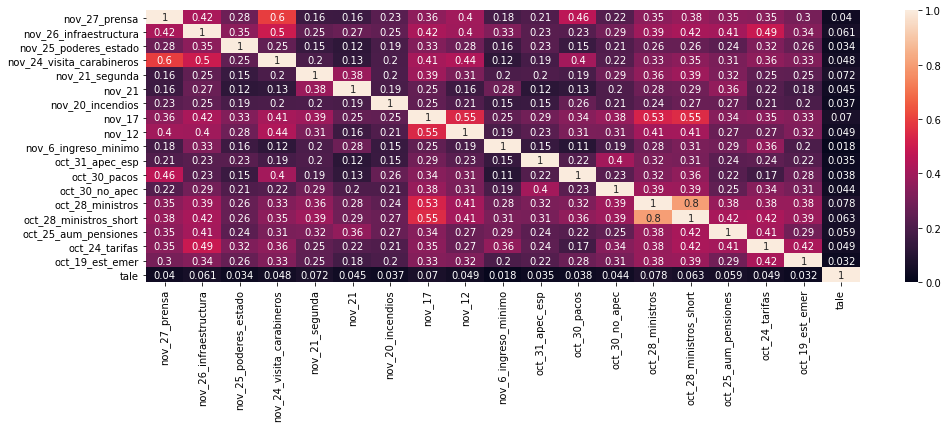

In [783]:
#plot de las palabras
plt.figure(figsize = (16,5))
sns.heatmap(df_cs, vmin=0, vmax=1, annot=True)

En una primera instancia, no tenemos tanta similitud entre los discursos. Esto nos dice que debemos ocupar sí o sí el método de soft cosine para diferenciar tópicos y agregar mayor puntaje a los más similares.

### Palabras más utilizadas en los discursos

In [784]:
#reordenamos el dataframe y elegimos las primeras 15 palabras
data = pd.DataFrame(df.sum().sort_values(ascending = False).head(15))
data.columns = ['num']
data

num
chilenos       99
chile          89
quiero         56
seguridad      56
gobierno       54
social         53
país           52
poder          51
público        50
orden          50
violencia      50
carabineros    49
va             44
paz            44
compatriotas   43

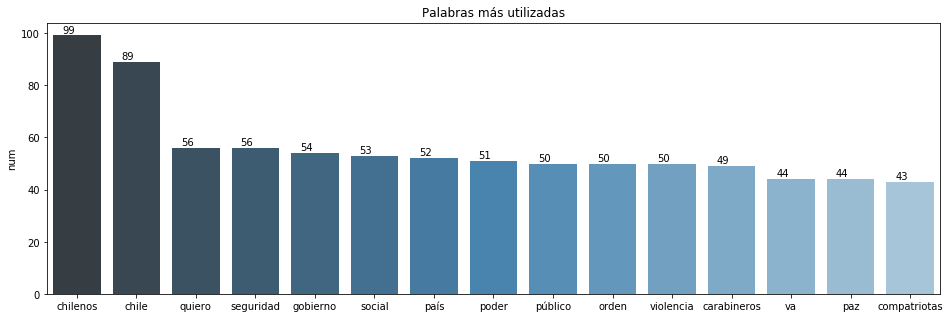

In [785]:
#ploteamos las palabras más utilizadas en los discursos
plt.figure(figsize = (16,5))
plt.title('Palabras más utilizadas')
sns.barplot(data.index, y="num", data=data, palette="Blues_d")
xlocs, xlabs = plt.xticks()
for i, v in enumerate(data.num):
    plt.text(xlocs[i] - 0.25, v + 1, str(v))

### Traducidos al inglés para uso de vectores y corpus

In [764]:
#función creada para leer discursos, reemplazar los saltos de línes y quitar stop words. Ahora en inglés.
cachedStopWords = stopwords.words("english")
def leer_discurso(discurso):
    f = open(discurso, "r") # abrir archivo
    text = f.read().replace('\n',' ')
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    f.close()
    return text

In [765]:
#leemos los discursos
+nov_27_prensa = leer_discurso('nov_27_prensa_en.txt')
nov_26_infraestructura = leer_discurso('nov_26_infraestructura_en.txt')
nov_25_poderes_estado = leer_discurso('nov_25_poderes_estado_en.txt')
nov_24_visita_carabineros = leer_discurso('nov_24_visita_carabineros_en.txt')
nov_20_incendios = leer_discurso('nov_20_incendios_en.txt')
nov_21_segunda = leer_discurso('nov_21_segunda_en.txt')
nov_21 = leer_discurso('nov_21_en.txt')
nov_17 = leer_discurso('nov_17_en.txt')
nov_12 = leer_discurso('nov_12_en.txt')
nov_6_ingreso_minimo = leer_discurso('nov_6_ingreso_minimo_en.txt')
oct_31_apec_esp = leer_discurso('oct_31_apec_esp_en.txt')
oct_30_pacos = leer_discurso('oct_30_pacos_en.txt')
oct_30_no_apec = leer_discurso('oct_30_no_apec_en.txt')
oct_28_ministros = leer_discurso('oct_28_ministros_en.txt')
oct_28_ministros_short = leer_discurso('oct_28_ministros_short_en.txt')
oct_25_aum_pensiones = leer_discurso('oct_25_aum_pensiones_en.txt')
oct_24_tarifas = leer_discurso('oct_24_tarifas_en.txt')
oct_19_est_emer = leer_discurso('oct_19_est_emer_en.txt')
tale = leer_discurso('tale_en.txt')

In [766]:
#guardamos los discursos en un array.
documents_en = [nov_27_prensa, nov_26_infraestructura, nov_25_poderes_estado, nov_24_visita_carabineros, nov_21_segunda, nov_21, nov_20_incendios, nov_17, nov_12, nov_6_ingreso_minimo, oct_31_apec_esp, oct_30_pacos, oct_30_no_apec, oct_28_ministros, oct_28_ministros_short, oct_25_aum_pensiones, oct_24_tarifas, oct_19_est_emer, tale]

In [767]:
##se crea el documento Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents_en)

#sparse Matrix a Pandas Dataframe para ver la frecuencia de las palabras.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['nov_27_prensa', 'nov_26_infraestructura', 'nov_25_poderes_estado', 'nov_24_visita_carabineros', 'nov_21_segunda', 'nov_21', 'nov_20_incendios', 'nov_17', 'nov_12', 'nov_6_ingreso_minimo', 'oct_31_apec_esp', 'oct_30_pacos', 'oct_30_no_apec', 'oct_28_ministros', 'oct_28_ministros_short', 'oct_25_aum_pensiones', 'oct_24_tarifas', 'oct_19_est_emer', 'tale'])
df

000  11  110  13  15  154  171  188  190  20  ...  \
nov_27_prensa                0   0    0   0   0    0    0    1    0   0  ...   
nov_26_infraestructura       0   0    0   0   0    0    0    0    0   0  ...   
nov_25_poderes_estado        0   0    0   0   0    0    0    0    0   0  ...   
nov_24_visita_carabineros    0   0    0   0   0    1    1    0    0   0  ...   
nov_21_segunda               0   0    0   0   0    0    0    0    0   0  ...   
nov_21                       0   0    0   0   0    0    0    0    0   0  ...   
nov_20_incendios             0   0    1   0   0    0    0    0    0   0  ...   
nov_17                       0   0    0   0   0    0    0    0    0   1  ...   
nov_12                       0   0    0   0   0    0    0    0    0   0  ...   
nov_6_ingreso_minimo         0   0    0   0   1    0    0    0    1   0  ...   
oct_31_apec_esp              0   0    0   1   0    0    0    0    0   0  ...   
oct_30_pacos                 0   0    0   0   0    0    0    0    0   1  ...   
oct_30_no_apec               0   0    0   0   0    0    0    0    0   0  ...   
oct_28_ministros             0   3    0   0   0    0    0    0    0   0  ...   
oct_28_ministros_short       0   0    0   0   0    0    0    0    0   0  ...   
oct_25_aum_pensiones         2   0    0   0   0    0    0    0    0   2  ...   
oct_24_tarifas               0   0    0   0   0    0    0    0    0   0  ...   
oct_19_est_emer              0   0    0   0   0    0    0    0    0   0  ...   
tale                         0   0    0   0   0    0    0    0    0   0  ...   

                           yes  yesterday  yet  you  yours  yourself  youth  \
nov_27_prensa                0          0    0    0      0         0      0   
nov_26_infraestructura       0          0    0    1      0         0      0   
nov_25_poderes_estado        0          0    0    0      0         0      0   
nov_24_visita_carabineros    0          0    0    0      0         0      0   
nov_21_segunda               0          0    0    0      0         0      0   
nov_21                       0          1    0    1      0         0      0   
nov_20_incendios             0          0    0    0      1         0      0   
nov_17                       0          0    2    1      0         0      0   
nov_12                       0          0    0    0      0         0      0   
nov_6_ingreso_minimo         0          0    0    0      0         0      0   
oct_31_apec_esp              0          3    0    0      0         0      0   
oct_30_pacos                 0          0    0    1      0         0      0   
oct_30_no_apec               0          0    0    0      0         0      0   
oct_28_ministros             0          0    0    1      0         1      1   
oct_28_ministros_short       0          0    0    1      0         0      0   
oct_25_aum_pensiones         2          1    1    0      0         0      0   
oct_24_tarifas               0          0    0    1      0         0      0   
oct_19_est_emer              0          0    0    0      0         0      0   
tale                         0          0    0    0      0         0      0   

                           zaldívar  zero  zones  
nov_27_prensa                     0     0      0  
nov_26_infraestructura            0     0      0  
nov_25_poderes_estado             0     0      0  
nov_24_visita_carabineros         0     0      0  
nov_21_segunda                    0     0      0  
nov_21                            1     0      0  
nov_20_incendios                  0     0      0  
nov_17                            0     0      0  
nov_12                            0     1      0  
nov_6_ingreso_minimo              0     0      0  
oct_31_apec_esp                   0     0      0  
oct_30_pacos                      0     0      0  
oct_30_no_apec                    0     1      0  
oct_28_ministros                  1     0      0  
oct_28_ministros_short            0     0      0  
oct_25_aum_pensiones         

In [768]:
#se crea la matrix para evaluar el cosine similarity
final_en = cosine_similarity(df, df)
df_cs = pd.DataFrame(final_en)

In [769]:
#renombrar columnas e índices.
df_cs.columns = ['nov_27_prensa', 'nov_26_infraestructura', 'nov_25_poderes_estado', 'nov_24_visita_carabineros', 'nov_21_segunda', 'nov_21', 'nov_20_incendios', 'nov_17', 'nov_12', 'nov_6_ingreso_minimo', 'oct_31_apec_esp', 'oct_30_pacos', 'oct_30_no_apec', 'oct_28_ministros', 'oct_28_ministros_short', 'oct_25_aum_pensiones', 'oct_24_tarifas', 'oct_19_est_emer', 'tale']
df_cs.index = ['nov_27_prensa', 'nov_26_infraestructura', 'nov_25_poderes_estado', 'nov_24_visita_carabineros', 'nov_21_segunda', 'nov_21', 'nov_20_incendios', 'nov_17', 'nov_12', 'nov_6_ingreso_minimo', 'oct_31_apec_esp', 'oct_30_pacos', 'oct_30_no_apec', 'oct_28_ministros', 'oct_28_ministros_short', 'oct_25_aum_pensiones', 'oct_24_tarifas', 'oct_19_est_emer', 'tale']

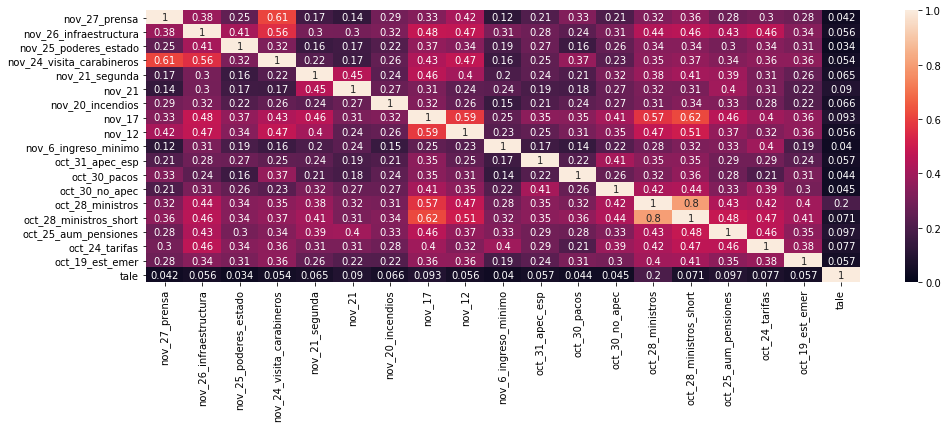

In [770]:
#graficamos los resultados
plt.figure(figsize = (16,5))
sns.heatmap(df_cs, vmin=0, vmax=1, annot=True)

Como era de esperar, obtenemos resultados similares con los discursos en inglés. Ocuparemos ahora el mismo array de discursos en inglés y un corpus para verificar qué tan similares son a través de Soft Cosine similarity.

### Vamos con un análisis con Soft Cosine

In [771]:
#preparamos el diccionario y un Corpus
dictionary = corpora.Dictionary([simple_preprocess(doc) for doc in documents_en])

#preparamos la matriz de similaridad
similarity_matrix = fasttext_model300.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)

#los textos los pasaremos a una bolsa de palabras o "Bag of words"

sent_0 = dictionary.doc2bow(simple_preprocess(nov_27_prensa))
sent_1 = dictionary.doc2bow(simple_preprocess(nov_26_infraestructura))
sent_2 = dictionary.doc2bow(simple_preprocess(nov_25_poderes_estado))
sent_3 = dictionary.doc2bow(simple_preprocess(nov_24_visita_carabineros))
sent_4 = dictionary.doc2bow(simple_preprocess(nov_21_segunda))
sent_5 = dictionary.doc2bow(simple_preprocess(nov_21))
sent_6 = dictionary.doc2bow(simple_preprocess(nov_20_incendios))
sent_7 = dictionary.doc2bow(simple_preprocess(nov_17))
sent_8 = dictionary.doc2bow(simple_preprocess(nov_12))
sent_9 = dictionary.doc2bow(simple_preprocess(nov_6_ingreso_minimo))
sent_10 = dictionary.doc2bow(simple_preprocess(oct_31_apec_esp))
sent_11 = dictionary.doc2bow(simple_preprocess(oct_30_pacos))
sent_12 = dictionary.doc2bow(simple_preprocess(oct_30_no_apec))
sent_13 = dictionary.doc2bow(simple_preprocess(oct_28_ministros))
sent_14 = dictionary.doc2bow(simple_preprocess(oct_28_ministros_short))
sent_15= dictionary.doc2bow(simple_preprocess(oct_25_aum_pensiones))
sent_16 = dictionary.doc2bow(simple_preprocess(oct_24_tarifas))
sent_17 = dictionary.doc2bow(simple_preprocess(oct_19_est_emer))
sent_18 = dictionary.doc2bow(simple_preprocess(tale))

sentences = [sent_0, sent_1, sent_2, sent_3, sent_4, sent_5, sent_6, sent_7, sent_8, sent_9, sent_10, sent_11, sent_12, sent_13, sent_14, sent_15, sent_16, sent_17, sent_18]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  """


In [772]:
#se calcula el soft cosine similarity entre el texto 5 y 6
print(softcossim(sent_5, sent_6, similarity_matrix))

0.5171956069324424


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  


In [773]:
#definimos una función para calcular nuestro soft cosine entre el conjunto de textos
def create_soft_cossim_matrix(sentences):
    len_array = np.arange(len(sentences))
    xx, yy = np.meshgrid(len_array, len_array)
    cossim_mat = pd.DataFrame([[round(softcossim(sentences[i],sentences[j], similarity_matrix) ,2) for i, j in zip(x,y)] for y, x in zip(xx, yy)])
    return cossim_mat

In [774]:
#calculamos la matrix final con todas los textos comparados
final = create_soft_cossim_matrix(sentences)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  after removing the cwd from sys.path.


In [775]:
#renombramos el dataframe final
final.columns = ['nov_27_prensa', 'nov_26_infraestructura', 'nov_25_poderes_estado', 'nov_24_visita_carabineros', 'nov_21_segunda', 'nov_21', 'nov_20_incendios', 'nov_17', 'nov_12', 'nov_6_ingreso_minimo', 'oct_31_apec_esp', 'oct_30_pacos', 'oct_30_no_apec', 'oct_28_ministros', 'oct_28_ministros_short', 'oct_25_aum_pensiones', 'oct_24_tarifas', 'oct_19_est_emer', 'tale']
final.index = ['nov_27_prensa', 'nov_26_infraestructura', 'nov_25_poderes_estado', 'nov_24_visita_carabineros', 'nov_21_segunda', 'nov_21', 'nov_20_incendios', 'nov_17', 'nov_12', 'nov_6_ingreso_minimo', 'oct_31_apec_esp', 'oct_30_pacos', 'oct_30_no_apec', 'oct_28_ministros', 'oct_28_ministros_short', 'oct_25_aum_pensiones', 'oct_24_tarifas', 'oct_19_est_emer', 'tale']


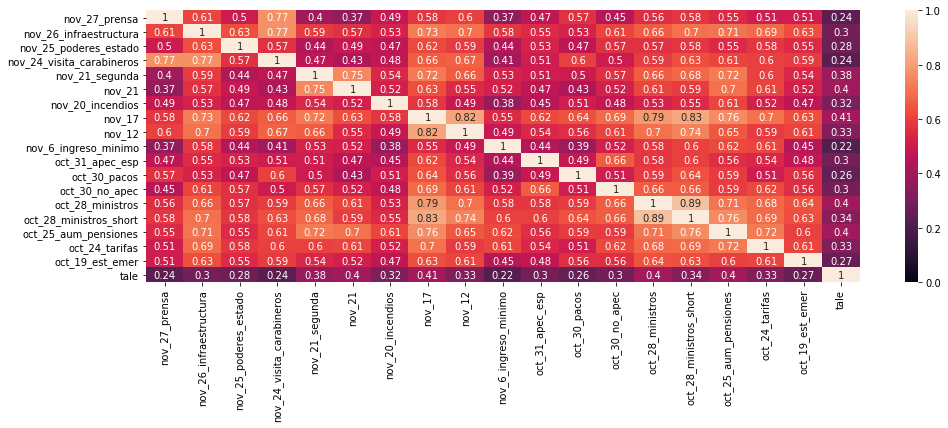

In [776]:
#graficamos los resultados
plt.figure(figsize = (16,5))
sns.heatmap(final, vmin=0, vmax=1, annot=True)

Como se logra apreciar, ahora obtenemos mucho mejores resultados con la nueva técnica aplicada. El Soft Cosine, me permite diferenciar tópicos y agrupar los más similares a través de su semántica.
Como se puede ver, los discursos son muy parecidos entre sí, destacando algunos altos con 72%, 73%, 77% y 82% de similitud. Sin duda una gran técnica política para no avanzar en soluciones.

### WordCloud de los discursos

Ahora se crearán distintas nubes para ver las palabras destacadas de algunos discursos. Comenzaremos por el general, que agrupa todos los discursos hasta lña fecha.

In [758]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

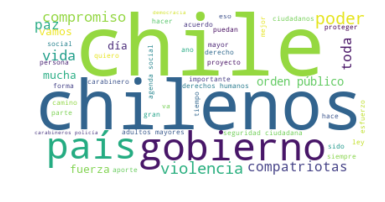

In [759]:
# Start with one review:
text = " ".join(documents_spa)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Discursos más parecidos

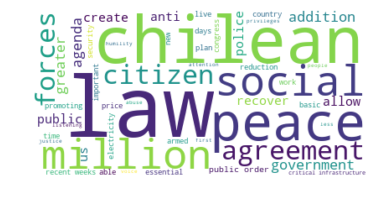

In [760]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(nov_26_infraestructura)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

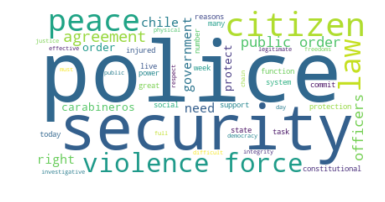

In [761]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(nov_24_visita_carabineros)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

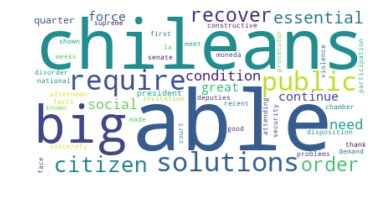

In [762]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(nov_25_poderes_estado)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

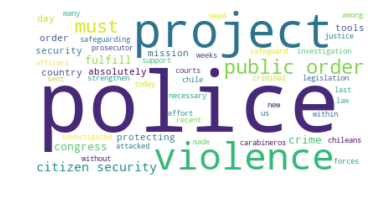

In [763]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(nov_27_prensa)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()